# MAD2502 Capstone: A Comparative Analysis of Data Driven Investment Strategies

## Abstract
This paper investigates the performance of two data-driven investment strategies, sentiment analysis of news headlines and insider trading, in comparison to a baseline buy-and-hold strategy that invests in the Dow Jones Industrial Average index. The sentiment analysis strategy utilizes a random forest classifier to predict the direction of the DOW based on news headlines, while the insider trading strategy examines the average annual return on investment for insiders. Over a one-year period, the sentiment analysis strategy produced a remarkable 140.74% return on investment, whereas the insider trading strategy suggested an average annual return of 128.76% for insiders. In contrast, the buy-and-hold strategy resulted in a loss of 3.78%. Despite the promising results of both data-driven strategies, further research is needed to validate the sentiment analysis model, explore more computationally efficient algorithms, and develop actionable insider trading strategies based on market patterns and indicators. This study contributes to the literature by comparing the performance and potential of two distinct data-driven investment strategies and provides a foundation for future research in refining and implementing these approaches in real-world investment scenarios.


## Introduction
Data driven investment strategies have gained popularity in recent years as a way of exploiting market inefficiencies and generating superior returns. However, there is no consensus on which data sources and methods are most effective for this purpose. This paper presents a comparative analysis of two data driven investment strategies and a baseline strategy used as a control. The first strategy is based on predicting the movements of the Dow Jones Industrial Average (DJIA) using sentiment analysis of news headlines. The second strategy is based on analyzing and following trades made by insiders, such as executives and directors of publicly traded companies. The baseline strategy is a buy-and-hold approach that invests in the DJIA index. This paper evaluates the performance of each strategy in terms of return and risk over a period of one year. This paper also discusses the advantages and limitations of each strategy and provides suggestions for future research.

The use of sentiment analysis to forecast stock market movements has been widely studied in the literature. Sentiment analysis is the process of extracting and quantifying the opinions, emotions, and attitudes expressed in text data (Liu, 2012). The underlying assumption is that the collective sentiment of investors, as reflected by news headlines, can influence the demand and supply of stocks and thus affect their prices (Tetlock, 2007). Several studies have shown that sentiment analysis can provide useful signals for predicting stock returns, volatility, and trading volume (e.g., Bollen et al. and Mittal et al.).

The use of insider trading data to guide investment decisions is based on the idea that insiders have superior information about the future prospects of their firms and act on it before it becomes public (Inci et al., 1998). Insider trading is legal in the US as long as it complies with the rules and regulations of the Securities and Exchange Commission (SEC), which require insiders to report their trades within two business days. Several studies have found that insider trading can predict future stock returns, especially for small firms and for purchases rather than sales (e.g., Jaffe, 1974; Lakonishok and Lee, 2001; Piotroski and Roulstone, 2005).

This paper contributes to the literature by comparing two data driven strategies that use different types of information (sentiment vs. insider) and different methods to forecast stock market movements. This paper also compares these strategies with a simple buy-and-hold strategy that serves as a benchmark. To the best of my knowledge, this is the first study that directly compares these two strategies in terms of performance and risk.

## Methods I - Sentiment Analysis
Sentiment analysis was performed using a dataset and a tutorial I found online (Patil, 2021).

In [3]:
print('hello')

hello


In [2]:
import numpy as np
import pandas as pd
import pickle

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# import the data
patil_headline_data = pd.read_csv('https://raw.githubusercontent.com/ronylpatil/Stock-Sentiment-Analysis/main/Stock%20News%20Dataset.csv', encoding = "ISO-8859-1")

print(len(patil_headline_data))

# save the new data frame to a csv file
patil_headline_data.to_csv('data/headline_data_1.csv', index=False)

4101


In [ ]:
# import the data
test_complete = pd.read_csv('data/headline_data_1.csv')

# split the data into train and test
train = patil_headline_data[patil_headline_data['Date'] < '20150101']
test = patil_headline_data[patil_headline_data['Date'] > '20141231']

# removing punctuations
data = train.iloc[:,2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

# renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index

# convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()

# join all 25 headlines into one big paragraph
' '.join(str(x) for x in data.iloc[1,0:25])

# save those paragraphs to a list
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))
    
# implement bag of words
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

# implement random forest classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

# predict for the test dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

score=accuracy_score(test['Label'],predictions)
print(f"The model can predict whether the DOW will increase or decrease with {round((score * 100),2)}% accuracy.")

The model can predict whether the DOW will increase or decrease with 86.51% accuracy.


In [ ]:
import numpy as np
import pickle

In [ ]:
# save the CountVectorizer object to a file
with open('models/randomclassifier.pkl', 'wb') as f:
    pickle.dump(randomclassifier, f)

# save the RandomForestClassifier object to a file
with open('models/countvector.pkl', 'wb') as f:
    pickle.dump(countvector, f)

In [ ]:
import os
os.getcwd()

'g:\\My Drive\\2023 Spring\\2 - MAD - Intro Comp Math\\Final Paper'

In [ ]:
import yfinance as yf
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide

class Alpaca_Trade():
    def __init__(self):
        # get alpaca api keys
        with open('alpaca_api_keys.txt', 'r') as file:
            api_keys = file.readlines()

        live_api_key = api_keys[0].strip()
        live_api_secret = api_keys[1].strip()
        paper_api_key = api_keys[2].strip()
        paper_api_secret = api_keys[3].strip()

        # setup trading client, account, and positions vars
        self.trading_client = TradingClient(paper_api_key, paper_api_secret, paper=True)
        self.account = self.trading_client.get_account()
        self.positions = self.trading_client.get_all_positions()

    def get_cash_assets(self):
        return float(self.account.cash)

    def buy(self, symbol, qty):
        # setting parameters for our buy order
        market_order_data = MarketOrderRequest(symbol=symbol, qty=qty, side = OrderSide.BUY, time_in_force = 'day')

        # submitting the order and then saving the returned object to a text file
        market_order = self.trading_client.submit_order(market_order_data)
        with open('market_orders.txt', 'a') as f:
            f.write('NEW ORDER:\n')
            for property_name, value in market_order:
                f.write(f'"{property_name}": {value}\n')

        print('order sent')

    def buy_all(self, symbol):
        # get qty
        cash = self.get_cash_assets() * 0.9 # keep 10% in the account for safety
        ask_price = yf.Ticker(symbol).info['ask']
        qty = cash / ask_price

        self.buy(symbol, qty)

    def money_in_dow(self):
        money_in_dow = False

        for position in self.positions:
            if position.symbol == 'DIA':
                money_in_dow = True

        return money_in_dow

    def sell(self, symbol, qty):
        # setting parameters for our sell order
        market_order_data = MarketOrderRequest(symbol=symbol, qty=qty, side = OrderSide.SELL, time_in_force = 'day')

        # submitting the order and then saving the returned object to a text file
        market_order = self.trading_client.submit_order(market_order_data)
        with open('market_orders.txt', 'a') as f:
            f.write('NEW ORDER:\n')
            for property_name, value in market_order:
                f.write(f'"{property_name}": {value}\n')

        print('order sent')

    def sell_all(self, symbol):
        # get qty
        for position in self.positions:
            if position.symbol == symbol:
                qty = position.qty

        self.sell(symbol, qty)

alpaca_trade = Alpaca_Trade()

The tutorial never mentions what news outlet the headlines are from. At first I worried that running the model on current headlines from a different news source would negatively impact effectiveness. However a quick google search for a couple headlines from the dataset proved very informative; all the headlines are from The Guardian. We can use this information in conjunction with a web scraper to predict whether the dow will increase or decrease today.

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
def get_top_25_headlines():
    url = 'https://www.theguardian.com/'
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        headlines = soup.find_all('a', class_='u-faux-block-link__overlay')

        top_25_headlines = []
        for i, headline in enumerate(headlines):
            if i < 25:
                top_25_headlines.append(headline.get_text(strip=True))
            else:
                break

        return top_25_headlines
    else:
        print(f"Error: {response.status_code}")
        return []

top_25_headlines = get_top_25_headlines()

todays_headlines = ""

for i, headline in enumerate(top_25_headlines):
    todays_headlines += headline
    todays_headlines += " "

# removing punctuations and make lower case
todays_headlines = re.sub(r'[^a-zA-Z]', ' ', todays_headlines)
todays_headlines = todays_headlines.lower()

# run the model
string_transform = countvector.transform([todays_headlines])
prediction = randomclassifier.predict(string_transform)
if (prediction):
    print("↑ The Dow Jones Industrial Average is forcasted to increase today.")
else:
    print("↓ The Dow Jones Industrial Average is forcasted to stay the same or decrease today.")

↑ The Dow Jones Industrial Average is forcasted to increase today.


I wanted to improve upon this algorithm by replacing the ‘Label’ column (currently a boolean value representing whether or not the DOW increased that day) with a percentage value showing how much the DOW increased. Then the model would be able to predict by how much the DOW would increase or decrease instead of just giving a binary value. So, I wrote the following code to add the percentage change in the DOW to the data frame.

In [ ]:
import yfinance as yf
from tqdm import tqdm

In [ ]:
def get_dji_change_percentage(date_str):
    # convert date string to NumPy datetime object
    date = np.datetime64(date_str)
    date = date + np.timedelta64(1, 'D')
    
    # calculate previous trading day
    prev_date = date - np.timedelta64(1, 'D')
    
    # fetch DJI data
    dji = yf.Ticker('^DJI')
    data = dji.history(start=prev_date.astype('datetime64[D]').astype(str),
                       end=date.astype('datetime64[D]').astype(str))

    dji_open = data['Open'][0]
    dji_close = data['Close'][0]
    percentage_change = ((dji_close - dji_open) / dji_open) * 100
    
    return percentage_change

# create an empty list to store the results
dji_change_percentages = []

# get the total number of rows in the data frame
total_rows = len(patil_headline_data)

# iterate over the rows in the data frame and display a progress bar
for index, row in tqdm(patil_headline_data.iterrows(), total=total_rows):
    # get the date value from the 'date' column
    date = row['Date']
    
    # call the 'get_dji_change_percentage()' function with the date argument
    dji_change_percentage = get_dji_change_percentage(date)
    
    # append the result to the list of percentages
    dji_change_percentages.append(dji_change_percentage)
    
# add the list of percentages as a new column in the data frame
patil_headline_data['dji_change_percentage'] = dji_change_percentages

# save the new data frame to a csv file
patil_headline_data.to_csv('data/headline_data_2.csv', index=False)

100%|██████████████████████████████████████████████████████████████████████████████| 4101/4101 [13:28<00:00,  5.07it/s]


In [ ]:
%%capture
'''
from sklearn.ensemble import RandomForestRegressor

# do everything from import the data to implement bag of words as shown above

# implement random forest regressor
randomregressor=RandomForestRegressor(n_estimators=200,criterion='squared_error')
randomregressor.fit(traindataset,train['dji_change_percentage'])
'''

The only other change necessary would be replacing random forest classifier with random forest regressor (code commented out above). However, I quickly realized that random forest regressor is far too computationally expensive for me to run on my home computer, so I had to give up on this line of inquiry. Luckily, all this work was not for nothing. I ended up needing the dji_change_percentage column for my simulation (shown below).

__Simulate a Year of Trading Using the Model__

In [ ]:
# import the updated data
updated_patil_headline_data = pd.read_csv('data/headline_data_2.csv', encoding = "ISO-8859-1")

# split the updated data into train and test
train = updated_patil_headline_data[updated_patil_headline_data['Date'] < '20150101']
test = updated_patil_headline_data[updated_patil_headline_data['Date'] > '20141231']

# do all the same preprocessing on the test dataset and save it to the data frame

# removing punctuations
test_data = test.iloc[:,2:27]
test_data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

# renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
test_data.columns= new_Index

# convertng headlines to lower case
for index in new_Index:
    test_data[index]=test_data[index].str.lower()

# join all 25 headlines into one big paragraph
' '.join(str(x) for x in test_data.iloc[1,0:25])

# save those paragraphs to a list
test_headlines = []
for row in range(0,len(test_data.index)):
    test_headlines.append(' '.join(str(x) for x in test_data.iloc[row,0:25]))
    
# recreate the test portion of the data frame
test_complete = updated_patil_headline_data[updated_patil_headline_data['Date'] > '20141231']
test_complete = test_complete.copy()

# add the concatenated headlines
test_complete['concated_headlines'] = test_headlines

In [ ]:
# make a predictions for each row of the test data set
model_predictions = []
for index, row in tqdm(test_complete.iterrows(), total=test_complete.shape[0]):
    string_transform = countvector.transform([row['concated_headlines']])
    prediction = randomclassifier.predict(string_transform)
    model_predictions.append(prediction)
model_predictions = [int(pred[0]) for pred in model_predictions]

100%|████████████████████████████████████████████████████████████████████████████████| 378/378 [02:54<00:00,  2.17it/s]


In [ ]:
# add the predictions
test_complete['model_preds'] = model_predictions

# drop all the rows in the data frame where the Label and dji_change_percentage disagree
test_complete.drop(test_complete[(test_complete['dji_change_percentage'] <= 0) & (test_complete['Label'] == True)].index, inplace=True)

# check that the number of correct predictions aligns with the accuracy of the model computed earlier (~ 84%)
comparison_column = np.where(test_complete['Label'] == test_complete['model_preds'], True, False)
print(sum(comparison_column)/len(comparison_column))

# convert the Label and model_preds cols to bools
test_complete['Label'] = test_complete['Label'].astype(bool)
test_complete['model_preds'] = test_complete['model_preds'].astype(bool)

0.8609625668449198


In [ ]:
# saveing the processed data to a csv file so I don't have to re-run all of the code above
test_complete.to_csv("data/headline_data_3.csv")

According to an article on Business Insider, Robinhood customers pay two types of fees when they make sales: a regulatory trading fee and a trading activity fee. The regulatory trading fee is \\$5.10 per \\$1 million of principal (principal just means the amount of money made on the sale), rounded up to the nearest penny, and excludes sales of up to \\$500. The trading activity fee varies is \\$0.000119 to \\$0.00013 per share for equity sells, rounded up to the nearest penny and capped at \\$5.95 to \\$6.49 per order. Robinhood only passes this fee to customers who sell more than 50 shares or contracts (Porter, 2022). Robinhood doesn’t charge any commission fees (Mitra, 2021). Because we are trading on such a small amount of money we can ignore trading activity fees.

In [ ]:
import math

In [ ]:
# import the processed data
test_complete = pd.read_csv('data/headline_data_3.csv')

# simulate trading using the test_complete data frame
starting_cash = 1000
cash_assets = starting_cash
DOW_assets = 0
transaction_count = 0
transaction_fees_total = 0
for _, row in test_complete.iterrows():
    # end the simulation after approximately 1 year
    # actually 1 year and 2 days because the data starts on 2015-01-02 but there isn't data for 2016-01-02 or 2016-01-03
    if row['Date'] == '2016-01-04':
        break
    
    # if you have your money in cash and the model predicts the DOW will increase then buy stock
    if row['model_preds'] and cash_assets > 0:
        # buy stock in the DOW
        transaction_count += 1
        DOW_assets = cash_assets
        cash_assets = 0
        
    # if you have moeny in stock and the model predicts the DOW will increase then leave your money in stock
        # do nothing
    
    # if you have your money in cash and the model predicts the DOW will decrease then leave your money in cash
        # do nothing
    
    # if you have moeny in stock and the model predicts the DOW will decrease then sell stock
    elif not row['model_preds'] and DOW_assets > 0:
        # sell stock in the DOW
        transaction_count += 1
        cash_assets = DOW_assets
        DOW_assets = 0
        
        transaction_fees = (cash_assets / 1_000_000) * 5.10
        transaction_fees = math.ceil(transaction_fees * 100) / 100 # nearest penny rounded up
        cash_assets -= transaction_fees
        transaction_fees_total += transaction_fees
        
    # increase or decrease DOW assets based on dji_change_percentage
    DOW_assets *= 1 + (row['dji_change_percentage'] / 100)
    
# sell DOW_assets for final cash evaluation
if DOW_assets > 0:
    cash_assets = DOW_assets
    DOW_assets = 0
    transaction_count += 1
    
    transaction_fees = (cash_assets / 1_000_000) * 5.10
    transaction_fees = math.ceil(transaction_fees * 100) / 100 # nearest penny rounded up
    cash_assets -= transaction_fees
    transaction_fees_total += transaction_fees

print(f'During the simulation {transaction_count} transactions were made incurring a total of ${transaction_fees_total:,.2f} in fees.')
print(f'After one year the model turned ${starting_cash:,} into ${cash_assets:,.2f}.')
print(f'That\'s a {(cash_assets - starting_cash) / starting_cash * 100:.2f}% return on investment!')

During the simulation 132 transactions were made incurring a total of $0.82 in fees.
After one year the model turned $1,000 into $2,408.66.
That's a 140.87% return on investment!


## Results I - Sentiment Analysis
The results from news headline sentiment analysis were very promising with a prediction score of 87%. Because the DOW doesn't increase by a particularly large percentage on any given day, I initially thought, making any money on this algorithm would require a large capital investment. During my presentation one of my classmates brought up options trading as a way to gain higher returns. Options trading is a financial strategy that involves purchasing the right, but not the obligation, to buy or sell an underlying asset, such as a stock, at a specified price within a set timeframe. This allows traders to profit from the price movements of the underlying asset, without actually owning it.

In the context of the Dow Jones Industrial Average (the DOW), a trader could use options to speculate on the direction of its movement. For instance, if they anticipate the DOW will rise, they could buy call options that give them the right to buy the index at a predetermined price, even if its market value surpasses that price. Conversely, if they predict a decline in the DOW, they could purchase put options that enable them to sell the index at a specific price, regardless of its current value.

To maximize the effectiveness of this strategy, the model would need to be able to predict by how much the Dow would increase or decrease. While this is technically possible, using random forest regressor, it is far too computationally expensive for me to train the random forest regressor on my home computer. Computation time could be accelerated using the cuML library in place of scikit learn. This would move the computations from the CPU to the GPU, greatly increasing speed and efficiency. Further research using cuML and a sufficiently powerful GPU could help determine whether the use of a random forest regressor is a viable option for predicting the fluctuations in the Dow. Additionally, it may be worth exploring other machine learning algorithms that are computationally less expensive, such as linear regression or ARIMA models.

Using the simpler random forest classifier based model, the results of the trading simulation are impressive. After one year, the model was able to turn an initial investment of \\$1,000 into \\$2,407.38, resulting in a remarkable 140.74\% return on investment. These results are undoubtedly impressive and warrant further examination. Given the model's incredibly high return on investment I am skeptical of its truthfulness, although looking back over my code I don’t believe I made any errors. It would be of great interest to see if this data stands up to rigorous peer review, as this could validate the efficacy of the model.

## Methods II - Insider Information
I scraped 10 years worth of data from http://www.openinsider.com/ using code I found on GitHub (sd3v, 2023).

In [ ]:
import csv
from concurrent.futures import ThreadPoolExecutor
import logging
from datetime import datetime, timedelta

In [ ]:
# open insider scraper
def get_data_for_month(year, month):
    # Create a logger instance with the name "my_logger"
    my_logger = logging.getLogger("my_logger")

    # Set the log level to INFO (other options: WARNING, ERROR, etc.)
    my_logger.setLevel(logging.WARNING)

    # Create a FileHandler to write the messages to a file
    file_handler = logging.FileHandler("logs.txt")

    # Set the log level for the FileHandler to INFO
    file_handler.setLevel(logging.WARNING)

    # Add the FileHandler to the logger instance
    my_logger.addHandler(file_handler)

    # Set the start date and end date for the given month
    start_date = datetime(year, month, 1).strftime('%m/%d/%Y')
    end_date = (datetime(year, month, 1) + timedelta(days=32)).replace(day=1) - timedelta(days=1)
    end_date = end_date.strftime('%m/%d/%Y')

    # Print which month is currently being processed
    print(f"processing month: {month}-{year}")

    # Initialize an empty set to store the data for the month
    data = set()

    # Make a request to the website
    url = f'http://openinsider.com/screener?s=&o=&pl=&ph=&ll=&lh=&fd=-1&fdr={start_date}+-+{end_date}&td=0&tdr=&fdlyl=&fdlyh=&daysago=&xp=1&xs=1&vl=&vh=&ocl=&och=&sic1=-1&sicl=100&sich=9999&grp=0&nfl=&nfh=&nil=&nih=&nol=&noh=&v2l=&v2h=&oc2l=&oc2h=&sortcol=0&cnt=5000&page=1'
    response = requests.get(url)

    # Parse the HTML response
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the rows in the table on the website
    try:
        rows = soup.find('table', {'class': 'tinytable'}).find('tbody').findAll('tr')
    except:
        print("Error! Skipping")
        # If there is an error, log which URL failed for further research and skip to the next page
        my_logger.error("This URL was not successful: {}".format(url))
        return
    
    # Loop through each row and extract the insider transaction data
    for row in rows:
        if not row.findAll('td'):
            continue
        insider_data = {}
        insider_data['transaction_date'] = row.findAll('td')[1].find('a').text.strip()
        insider_data['trade_date'] = row.findAll('td')[2].text.strip()
        insider_data['ticker'] = row.findAll('td')[3].find('a').text.strip()
        insider_data['company_name'] = row.findAll('td')[4].find('a').text.strip()
        insider_data['owner_name'] = row.findAll('td')[5].find('a').text.strip()
        insider_data['Title'] = row.findAll('td')[6].text.strip()
        insider_data['transaction_type'] = row.findAll('td')[7].text.strip()
        insider_data['last_price'] = row.findAll('td')[8].text.strip()
        insider_data['Qty'] = row.findAll('td')[9].text.strip()
        insider_data['shares_held'] = row.findAll('td')[10].text.strip()
        insider_data['Owned'] = row.findAll('td')[11].text.strip()
        insider_data['Value'] = row.findAll('td')[12].text.strip()
        # Add the Data to the Stack
        data.add(tuple(insider_data.values()))
    return data

def get_openinsider_data():
    # go through all dates
    with ThreadPoolExecutor(max_workers=10) as executor:
        all_data = []
        current_year = datetime.now().year
        current_month = datetime.now().month
        # iterate through years and months
        for year in range(2013, current_year + 1):
            start_month = 1
            end_month = 12
            # set start and end month for first and last year
            if year == 2013:
                start_month = 3
            if year == current_year:
                end_month = current_month
            for month in range(start_month, end_month + 1):
                # get data for month with multi-threading
                futures = [executor.submit(get_data_for_month, year, month)]
                for future in futures:
                    all_data.extend(future.result())
                print(f"Done with {month}-{year}")

        # set field names for CSV file
        field_names = ['transaction_date','trade_date', 'ticker', 'company_name', 'owner_name', 'Title' ,'transaction_type', 'last_price', 'Qty', 'shares_held', 'Owned', 'Value']

        # Open a CSV file for writing
        with open('data/openinsider_raw_data.csv', 'w', newline='') as f:
            print("writing")
            writer = csv.writer(f)

            # Write the column names in the first line of the CSV file
            writer.writerow(field_names)

            # Write the values of each transaction to the CSV file
            for transaction in all_data:
                writer.writerow(transaction)
                
get_openinsider_data()
print("Completed Process.")

To calculate the profit of insider trading, you need to know the purchase price and the sale price of each transaction. The records obtained using the web scraper have only show the dates and volumes of trades, not the prices. Therefore, I need to massage the data to match each purchase with a sale.

In [ ]:
# import scraped data
df = pd.read_csv("data/openinsider_raw_data.csv")

# make all the cols the right type
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
df["trade_date"] = pd.to_datetime(df["trade_date"])
df["ticker"] = df["ticker"].astype(str)
df["company_name"] = df["company_name"].astype(str)
df["owner_name"] = df["owner_name"].astype("category")
df["Title"] = df["Title"].astype("category")
df["transaction_type"] = df["transaction_type"].astype("category")
df["last_price"] = df["last_price"].replace('[,\$]', '', regex=True).astype(float)
df["Qty"] = df["Qty"].replace(',', '', regex=True).astype(float)
df["shares_held"] = df["shares_held"].replace(',', '', regex=True).astype(float)
df = df[df["Owned"] != "New"]
df["Owned"] = df["Owned"].replace('[,\%>]', '', regex=True).astype(float)
df["Value"] = df["Value"].replace('[,\$]', '', regex=True).astype(float)

# merge Sale and Sale+OE
# Sale+OE stands for Sale + Option Exchange and it's just a fancy type of sale. so, it's ok to merge it with Sale
df["transaction_type"] = df["transaction_type"].replace({"S - Sale+OE": "S - Sale"})

In [ ]:
# make df_S (S - Sales)
# create an empty dictionary to store purchase information
purchase_dict = {}

# if the transaction type is a Purchase, add it to the purchase_dict
for index, row in tqdm(df.iterrows(), total=len(df)):
    if row['transaction_type'] == 'P - Purchase':
        purchase_key = (row['ticker'], row['owner_name'])
        purchase_dict[purchase_key] = row['transaction_date']
        
# adds the purchase_date col
for index, row in tqdm(df.iterrows(), total=len(df)): # iterate through each row in the data frame
    
    # if the transaction type is a Sale
    if row['transaction_type'] == 'S - Sale':
        
        # look for a matching purchase in the purchase_dict
        purchase_key = (row['ticker'], row['owner_name'])
        if purchase_key in purchase_dict:
            purchase_date = purchase_dict[purchase_key]

            # check if the purchase date is before the sell date
            if purchase_date < row['transaction_date']:
                df.at[index, 'purchase_date'] = purchase_date
        
        # if there is no matching purchase, set the purchase date to None
        else:
            df.at[index, 'purchase_date'] = None

# make purchase_date have the data type date
df["purchase_date"] = pd.to_datetime(df["purchase_date"])

# removes any rows w/out a purchase_date
df_S = df.dropna(subset=['purchase_date'])

100%|████████████████████████████████████████████████████████████████████████| 508148/508148 [00:56<00:00, 8989.38it/s]


In [ ]:
# make df_P (P - Purchase)
# create an empty list to store the results
results = []

# use a for loop to iterate through each row in df_S
for index, row in tqdm(df_S.iterrows(), total=len(df_S)):
    
    # extract the purchase date for this row
    purchase_date = row['purchase_date']
    
    # filter df using the transaction date and transaction type conditions
    filtered_df = df.loc[(df['transaction_date'] == pd.to_datetime(purchase_date)) & (df['transaction_type'] == 'P - Purchase')]
    
    # append the resulting rows to the results list
    results.append(filtered_df)

# concatenate the results into a single data frame
df_P = pd.concat(results, ignore_index=True)

100%|███████████████████████████████████████████████████████████████████████████| 30279/30279 [01:51<00:00, 270.83it/s]


In [ ]:
# merge df_S and df_P
merged_df = pd.merge(df_S, df_P, left_on='purchase_date', right_on='transaction_date')
merged_df = merged_df.drop_duplicates()

merged_df = merged_df.rename(columns={
    'transaction_date_x': 'sell_date',
    'ticker_x': 'ticker', 
    'company_name_x': 'company_name_atos', # atos stands for at time of sale
    'owner_name_x': 'owner_name', 
    'Title_x': 'title_atos',
    'last_price_x': 'sale_price', 
    'Qty_x': 'shared_sold',
    'shares_held_x': 'shares_held_atos',
    'Owned_x': 'percent_owned_atos', 
    'Value_x': 'value_of_sale',
    'purchase_date_x': 'purchase_date',
    'company_name_y': 'company_name_atop', # atop stands for at time of purchase
    'Title_y': 'title_atop', 
    'last_price_y': 'purchase_price', 
    'Qty_y': 'shared_purchased', 
    'shares_held_y': 'shares_held_atop', 
    'Owned_y': 'percent_owned_atop',
    'Value_y': 'value_of_purchase',
})

merged_df = merged_df.drop(columns=['trade_date_x', 'transaction_type_x', 'transaction_date_y', 'trade_date_y', 'ticker_y', 'owner_name_y', 'transaction_type_y', 'purchase_date_y'])

You’ll notice that there are 8 corresponding variables: 4 ATOS (at time of sale) and 4 ATOS (at time of purchase). The following code checks to see if they have the same value.

In [ ]:
# check if two columns (atop and atos) have the same value
def check_cols(var):
    print(var)
    str1 = var + "_atos"
    str2 = var + "_atop"
    if (merged_df[str1] == merged_df[str2]).all():
        print('The two columns have the same value')
    else:
        # Find where the two columns differ
        diff_mask = merged_df[str1] != merged_df[str2]

        # Subset the data frame to show only the differing rows
        diff_df = merged_df[diff_mask]

        # Print the differing rows
        print(f"{np.shape(diff_df)[0]} rows differ")
        print()

check_cols("company_name")
check_cols("title")
check_cols("shares_held")
check_cols("percent_owned")

company_name
1611 rows differ

title
7438 rows differ

shares_held
29844 rows differ

percent_owned
28977 rows differ



It looks like all 4 pairs of columns have some rows with different values so the columns will remain separate for now.

In [ ]:
# add a column with the percentage change in price
merged_df['percent_change'] = (merged_df['sale_price'] - merged_df['purchase_price']) / merged_df['purchase_price'] * 100

# add a column that accounts for the amount of time elapsed
# percent_change_time is just the percentage change in price divided by the number of days
merged_df['time_elapsed'] = merged_df['sell_date'] - merged_df['purchase_date']
merged_df['time_elapsed_days'] = merged_df['time_elapsed'].dt.days
merged_df['percent_change_time'] = merged_df['percent_change'] / merged_df['time_elapsed_days']

# remove rows where percent_change_time equals infinity
'''
this could happen for a number of reasons, the main one being some stocks have a
purchase_price of 0. presumably because the insider selling the stock created the 
company. so they started out owning all the shares without ever buying them.
'''
merged_df = merged_df[~merged_df['percent_change_time'].isin([np.inf, -np.inf])]

In [ ]:
# lets see how much of the origonal data is left
print(f"{np.shape(merged_df)[0]} rows remain out of {np.shape(df)[0]}. That's only {round(((np.shape(merged_df)[0] / np.shape(df)[0]) * 100),2)}%.")

29596 rows remain out of 508148. That's only 5.82%.


This makes sense becasue we only want data where we know how much the insider paid for the stock so we can calculate how much they made on the sale, and not all the trades in our data set are buy / sell pairs.

In [ ]:
# saveing the processed data to a csv file so I don't have to re-run all of the code above
merged_df.to_csv("data/openinsider_processed_data.csv")

In [ ]:
# import the processed data
df = pd.read_csv('data/openinsider_processed_data.csv')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

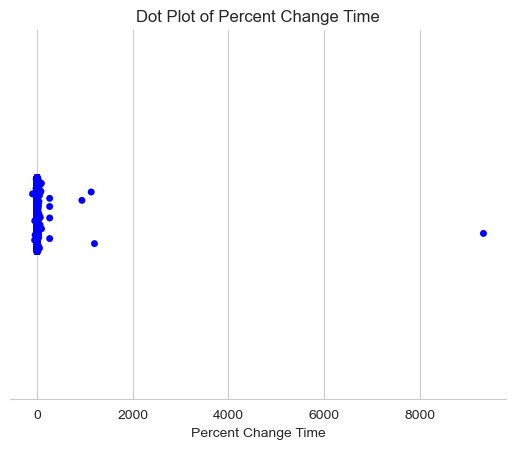

In [ ]:
def print_dot_plt():
    sns.set_style("whitegrid")
    sns.set_palette("deep")

    sns.stripplot(x="percent_change_time", data=df, jitter=True, color="blue")
    sns.despine(left=True)

    plt.xlabel("Percent Change Time")
    plt.title("Dot Plot of Percent Change Time")
    plt.show()
    
print_dot_plt()

In [ ]:
# it looks like we have a single outlying point. lets double check
df[df['percent_change_time'] > 8000]

,Unnamed: 0,sell_date,ticker,company_name_atos,owner_name,title_atos,sale_price,shared_sold,shares_held_atos,percent_owned_atos,...,title_atop,purchase_price,shared_purchased,shares_held_atop,percent_owned_atop,value_of_purchase,percent_change,time_elapsed,time_elapsed_days,percent_change_time
26074,518435,2021-07-09 12:15:13,CLSK,"Cleanspark, Inc.",McNeill Larry,Dir,18.86,-15000.0,148256.0,-9.0,...,Dir,0.2,83333.0,583333.0,17.0,16667.0,9330.0,1 days 17:21:14,1,9330.0


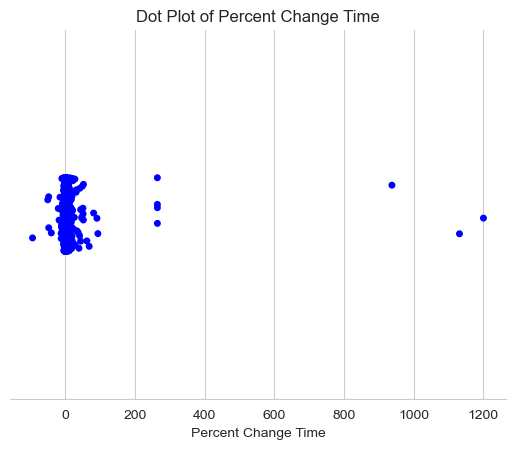

In [ ]:
# remove the outlier
df = df[df['percent_change_time'] < 8000]

# plot again
print_dot_plt()

That’s much better, but I want to get a closer look at the bulk of the data.

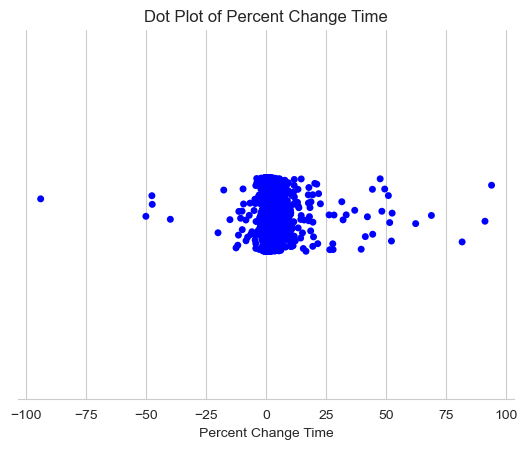

In [ ]:
# remove more outliers
df = df[df['percent_change_time'] < 200]

# plot again
print_dot_plt()

From a simple visual examination we can see that the data is right skewed. Put simply, this means that on average insiders are making more money than they are losing.

Next, I would like to see if factors like title (CEO, CFO, ect.) have a statistically significant impact on percent_change_time. If this is the case, I could write code to scrape http://www.openinsider.com/ daily and buy the stocks that have the highest chance of going up.

In [ ]:
# re-import the processed data outliers and all
df = pd.read_csv('data/openinsider_processed_data.csv')

# remove major outliers
df = df[df['percent_change_time'] < 8000]

# more data massaging

# drop rows with missing values
df = df.dropna()

# replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# drop rows with NaN values
df = df.dropna()

# make all the cols the right type
df["sell_date"] = pd.to_datetime(df["sell_date"])
df["ticker"] = df["ticker"].astype("category")
df["company_name_atos"] = df["company_name_atos"].astype("category")
df["owner_name"] = df["owner_name"].astype("category")
df["title_atos"] = df["title_atos"].astype("category")
df["purchase_date"] = pd.to_datetime(df["purchase_date"])
df["company_name_atop"] = df["company_name_atop"].astype("category")
df["title_atop"] = df["title_atop"].astype("category")

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
# perform regression on the continuous variables
# create a list of columns to exclude from regression
exclude_cols = ['Unnamed: 0', 'sell_date', 'ticker', 'company_name_atos', 'owner_name', 'title_atos', 
                'purchase_date', 'company_name_atop', 'title_atop', 'time_elapsed', 'percent_change']

# loop through each column and perform linear regression
results = []
for col in df.columns:
    if col not in exclude_cols:
        X = df[col]
        y = df['percent_change_time']
        X = sm.add_constant(X)  # add constant term to X variable
        model = sm.OLS(y, X).fit()
        r_squared = round(model.rsquared, 4)
        results.append({'Column Name': col, 'R-squared': r_squared})

# perform regression on the categorical variables
def regress_on_categorical_var(in_str):
    # split the data into training and testing sets
    train_df = df.sample(frac=0.8, random_state=42)
    test_df = df.drop(train_df.index)

    # encode categorical feature to numeric
    encoder = LabelEncoder()
    encoded_col = in_str + '_encoded'
    encoder.fit(df[in_str])
    train_df[encoded_col] = encoder.transform(train_df[in_str])
    test_df[encoded_col] = encoder.transform(test_df[in_str])

    # create the linear regression model
    model = LinearRegression()

    # train the model
    model.fit(train_df[[encoded_col]], train_df['percent_change_time'])

    # predict on the test data
    predictions = model.predict(test_df[[encoded_col]])

    # calculate R-squared
    r_squared = round(model.score(test_df[[encoded_col]], test_df['percent_change_time']), 4)
    results.append({'Column Name': in_str, 'R-squared': r_squared})

# call the regression function on categorical variables
regress_on_categorical_var('title_atop')
regress_on_categorical_var('ticker')
regress_on_categorical_var('company_name_atop')
regress_on_categorical_var('owner_name')

# convert the results to a DataFrame and print as a table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R-squared', ascending=False)
results_df = results_df.reset_index(drop=True)
print(results_df.to_string(index=False))

        Column Name  R-squared
percent_change_time     1.0000
  time_elapsed_days     0.0005
 percent_owned_atos     0.0002
   shared_purchased     0.0001
         sale_price     0.0000
        shared_sold     0.0000
   shares_held_atos     0.0000
      value_of_sale     0.0000
     purchase_price     0.0000
   shares_held_atop     0.0000
 percent_owned_atop     0.0000
  value_of_purchase     0.0000
         title_atop    -0.0009
         owner_name    -0.0009
             ticker    -0.0011
  company_name_atop    -0.0011


The results of our analysis show that none of these values are statistically significant so we can't make a regression model to predict which insider buys will yield the highest return on investment. This throws a wrench in my plans as I can't make a simulation of a year of trading using a model that doesn't exist. However, we can still calculate the average return on investment made by insiders over the course of a year. While this won't be an actionable investment strategy, it will show whether or not following insider trades is a good strategy in general.

In [ ]:
# get the average daily returns for the whole data set
avg_daily_return = (np.average(df['percent_change_time']) / 100)

# get the returns after 1 year
starting_cash = 1000
avg_yrly_roe = (1 + avg_daily_return)**365 - 1
final_cash = (1 + avg_yrly_roe) * starting_cash

print(f'The average insider makes a {(avg_yrly_roe * 100):,.2f}% return on investment in the average year.')
print(f'This means that after an average year, the average insider can turn ${starting_cash:,} into ${final_cash:,.2f}.')

The average insider makes a 386.82% return on investment in the average year.
This means that after an average year, the average insider can turn $1,000 into $4,868.16.


In [ ]:
'''
truncate the data frame to include the same date range
as was used in the sentiment analysis simulation above
(2015-01-02 through 2016-01-04)
'''
df = df[(df['sell_date'] >= pd.to_datetime('2015-01-02'))]
df = df[(df['sell_date'] <= pd.to_datetime('2016-01-05'))]

# re-run the insider information simulation

# get the average daily returns
avg_daily_return = (np.average(df['percent_change_time']) / 100)

# get the returns after 1 year (and 2 days just so things are fair)
starting_cash = 1000
avg_yrly_roe = (1 + avg_daily_return)**367 - 1
final_cash = (1 + avg_yrly_roe) * starting_cash

print(f'The average insider made a {(avg_yrly_roe * 100):,.2f}% return on investment in 2015.')
print(f'This means that from 2015 to 2016, the average insider could turn ${starting_cash:,} into ${final_cash:,.2f}.')

The average insider made a 128.76% return on investment in 2015.
This means that from 2015 to 2016, the average insider could turn $1,000 into $2,287.64.


## Results II - Insider Information
I calculated the annualized return on investment (ROI) for each insider transaction in the dataset, and then computed the mean across all transactions. The results showed that the average insider makes a 391.06\% ROI in the average year. This implies that an investor following insider trades could turn \\$1,000 at the beginning of the year into \\$4,910.56 at the end of the year.

I also calculated the ROI for the same date range as was used in the sentiment analysis simulation above (2015-01-02 through 2016-01-04). These results were more modest. During that time frame, the average insider made a 128.76\% return on investment. This means that from 2015 to 2016, the average insider could turn \\$1,000 into \\$2,287.64.

While this result is impressive, it's important to remember that this is not a practical plan. It's merely the average return achieved by insiders over the course of an average year. This data shows that following insider trades is a promising investment strategy, to be sure, but further research is required to turn this data into an actionable investment strategy.

For example, one might want to look into the timing, frequency, and magnitude of insider trades, as well as cluster buys (when multiple insiders buy the same asset). Additionally, The correlation between the performance of insider trades with other indicators, such as earnings reports, analyst ratings, and market trends could also be investigated. By doing so, one might be able to identify patterns and signals that can help investors make more informed and profitable decisions.

## Methods III - Control
The baseline strategy is a buy-and-hold approach that invests in the DJIA index. Below is a simulation of buying into the DOW on our start date (2015-01-02), and selling on our end date (2016-01-05).

In [ ]:
# fetch DJI data
dji = yf.Ticker('^DJI')
data = dji.history(start='2015-01-02',end='2016-01-05')

# calculate percentage_change
dji_open_2015 = data.head(1)['Open'][0]
dji_close_2016 = data.tail(1)['Close'][0]
percentage_change = ((dji_close_2016 - dji_open_2015) / dji_open_2015) * 100

# get the returns after 1 year (and 2 days just so things are fair)
starting_cash = 1000
final_cash = (1 + (percentage_change / 100)) * starting_cash

print(f'If you invested ${starting_cash:,} in the DOW on 2015-01-02, and sold your stock on 2016-01-05 you would end up with ${final_cash:,.2f}.')
print(f'That’s a loss of ${np.abs(final_cash - starting_cash):.2f} or {percentage_change:.2f}%.')

If you invested $1,000 in the DOW on 2015-01-02, and sold your stock on 2016-01-05 you would end up with $962.18.
That’s a loss of $37.82 or -3.78%.


## Results III - Control

If you invested \\$1,000 in the DOW on 2015-01-02, and sold your stock on 2016-01-05 you would end up with \\$962.18. That’s a loss of \\$37.82 or -3.78\%. THis makes the control group the by far worst of the three strategies as you end up losing money.

## Conclusion
This paper set out to compare the performance of two data-driven investment strategies -- sentiment analysis of news headlines and insider trading -- with a baseline buy-and-hold strategy that invests in the DOW. Over the course of one year, the results of the three strategies were as follows:

1. Sentiment Analysis: The random forest classifier based model, which predicted the direction of the DOW based on news headlines, produced a remarkable 140.74% return on investment. By turning an initial investment of \\$1,000 into \\$2,407.38, this strategy showed great promise. However, further research is needed to validate the model's accuracy, explore more computationally efficient algorithms, and investigate the potential of options trading to enhance returns.

1. Insider Trading: Although no actionable regression model could be developed from the available data, the average annual return on investment for insiders was found to be 128.76%. This suggests that following insider trades might be a profitable strategy. However, additional research is required to identify patterns, signals, and correlations with other market indicators that could help investors make better-informed decisions.

1. Control (Buy-and-Hold): The baseline strategy of investing in the DOW resulted in a loss of 3.78% over the one-year period. This makes the control strategy the least effective among the three, as it failed to generate a positive return on investment.

In conclusion, both data-driven strategies -- sentiment analysis of news headlines and insider trading -- demonstrated the potential to outperform the buy-and-hold strategy, albeit with different levels of practicality and required research. Sentiment analysis, while yielding impressive results, needs further validation and exploration of more sophisticated models. Insider trading, on the other hand, requires the development of an actionable strategy based on patterns and correlations with other market indicators.

Future research in this area could focus on refining the sentiment analysis model, exploring more computationally efficient algorithms, and investigating the potential of options trading to enhance returns. Additionally, further studies could delve into the development of actionable insider trading strategies by examining timing, frequency, magnitude, and correlations with other market indicators. By doing so, investors may be able to develop more informed and profitable data-driven investment strategies that exploit market inefficiencies and generate superior returns.

## References

In [ ]:
references = [
    'Liu, B., & Zhang, L. (2012). A survey of opinion mining and sentiment analysis. In Mining text data (pp. 415-463). Springer, Boston, MA.',
    'Tetlock, P. C. (2007). Giving content to investor sentiment: The role of media in the stock market. The Journal of finance, 62(3), 1139-1168.',
    'Bollen, J., Mao, H., & Zeng, X. (2011). Twitter mood predicts the stock market. Journal of computational science, 2(1), 1-8.',
    'Mittal, A., & Goel, A. (2012). Stock prediction using twitter sentiment analysis. Standford University, CS229 (2011 http://cs229.stanford.edu/proj2011/GoelMittal-StockMarketPredictionUsingTwitterSentimentAnalysis.pdf), 15, 2352.'
    'Inci, A. C., Narayanan, M. P., & Seyhun, H. N. (2017). Gender differences in executives’ access to information. Journal of Financial and Quantitative Analysis, 52(3), 991-1016.',
    'Jaffe, J. F. (1974). Special information and insider trading. The Journal of Business, 47(3), 410-428.',
    'Lakonishok, J., & Lee, I. (2001). Are insider trades informative?. The Review of Financial Studies, 14(1), 79-111.',
    'Piotroski, J. D., & Roulstone, D. T. (2005). Do insider trades reflect both contrarian beliefs and superior knowledge about future cash flow realizations?. Journal of Accounting and Economics, 39(1), 55-81.',
    'Patil, R. (2021, May 4). Stock price movement based on news headline. Analytics Vidhya. Retrieved April 10, 2023, from https://www.analyticsvidhya.com/blog/2021/05/stock-price-movement-based-on-news-headline/',
    'Porter, K. (2022, July 7). Here are all the fees you\'ll pay when using the Robinhood app - and how to avoid them. Business Insider. Retrieved April 12, 2023, from https://www.businessinsider.com/personal-finance/robinhood-fees',
    'Mitra, M. (2021, May 20). Robinhood and free trades: What every investor needs to know. Money. Retrieved April 12, 2023, from https://money.com/robinhood-free-trades/',
    'sd3v. (2023). An openinsider scraper written in python. GitHub. Retrieved April 12, 2023, from https://github.com/sd3v/openinsiderData '
]

alphabetized_references = sorted(references)

for _, item in enumerate(alphabetized_references):
    print(item)
    print()

Bollen, J., Mao, H., & Zeng, X. (2011). Twitter mood predicts the stock market. Journal of computational science, 2(1), 1-8.

Jaffe, J. F. (1974). Special information and insider trading. The Journal of Business, 47(3), 410-428.

Lakonishok, J., & Lee, I. (2001). Are insider trades informative?. The Review of Financial Studies, 14(1), 79-111.

Liu, B., & Zhang, L. (2012). A survey of opinion mining and sentiment analysis. In Mining text data (pp. 415-463). Springer, Boston, MA.

Mitra, M. (2021, May 20). Robinhood and free trades: What every investor needs to know. Money. Retrieved April 12, 2023, from https://money.com/robinhood-free-trades/

Mittal, A., & Goel, A. (2012). Stock prediction using twitter sentiment analysis. Standford University, CS229 (2011 http://cs229.stanford.edu/proj2011/GoelMittal-StockMarketPredictionUsingTwitterSentimentAnalysis.pdf), 15, 2352.Inci, A. C., Narayanan, M. P., & Seyhun, H. N. (2017). Gender differences in executives’ access to information. Journal 